### 합성곱

- 뉴런 = 필터 = 커널
- 출력 결과: 특성맵

- 풀링: 가로 세로 크기를 줄이는 역할 ( max, average )

- 각 필터는 고유한 가중치를 학습하므로, 중복된 입력 데이터를 처리하더라도 서로 다른 특징을 추출

#### 케라스 합성곱 층

In [ ]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu') # 필터 개수, 커널 사이즈

#### 풀링

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid') # 

#### Mnist 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 입력 이미지는 깊이(채널) 차원이 있어야 함 흑백 이미지이기 때문에 1 생성

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#### 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2)) # 풀링 레이어 2,2 맵의 크기 절반 -> 특성 맵의 크기는 (14, 14, 32-필터개수)

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten()) #
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 


2024-12-16 10:23:29.787598: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-16 10:23:29.787637: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-16 10:23:29.787645: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-16 10:23:29.787687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 10:23:29.787709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               313700    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 333526 (1.27 MB)
Trainable params: 333526 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________

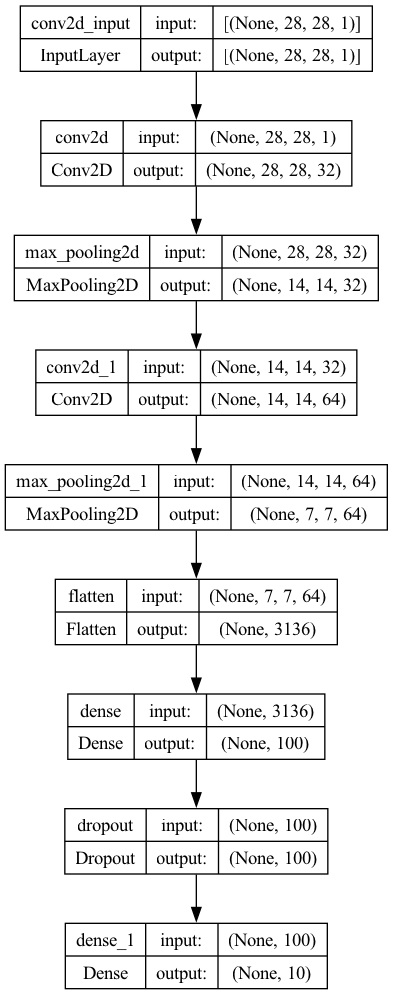

In [3]:
# 층의 구성을 그림으로 표현하는 방법

keras.utils.plot_model(model, show_shapes=True)

# pip install pydot 과 brew 혹은 사이트에서 graphviz 다운

In [4]:
# 모델 컴파일 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_sttopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                   restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_sttopping_cb])

Epoch 1/20


2024-12-16 10:32:59.592401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1495/1500 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.8126

2024-12-16 10:33:11.996842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 14s 8ms/step - loss: 0.5359 - accuracy: 0.8128 - val_loss: 0.3426 - val_accuracy: 0.8782
Epoch 2/20
  16/1500 [..............................] - ETA: 10s - loss: 0.4255 - accuracy: 0.8652

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 13s 9ms/step - loss: 0.3661 - accuracy: 0.8732 - val_loss: 0.3093 - val_accuracy: 0.8894
Epoch 3/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3281 - accuracy: 0.8862 - val_loss: 0.3483 - val_accuracy: 0.8788
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3122 - accuracy: 0.8932 - val_loss: 0.2694 - val_accuracy: 0.9043
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3048 - accuracy: 0.8980 - val_loss: 0.3275 - val_accuracy: 0.8897
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3070 - accuracy: 0.8974 - val_loss: 0.2896 - val_accuracy: 0.9022


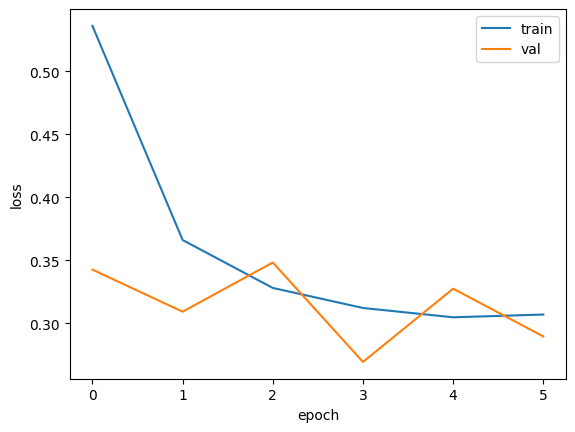

In [5]:
# 학습 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
# 검증 데이터 성능 평가

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2694 - accuracy: 0.9043


[0.2694469094276428, 0.9042500257492065]

In [14]:
# 테스트 데이터 성능 평가

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

 24/313 [=>............................] - ETA: 1s - loss: 0.2818 - accuracy: 0.9049

2024-12-16 10:41:43.919865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.2925 - accuracy: 0.8983


[0.2924533486366272, 0.8982999920845032]

### 합성곱 신경망 시각화

In [44]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [19]:
model.layers

In [24]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape) # 커널 크기 3,3 채널 크기 1, 필터 개수 32 / 절편의 개수 (필터마다 1개의 절편)

(3, 3, 1, 32) (32,)


In [26]:
# 가중치 배열 평균과 표준편차

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())


-0.038480356 0.23455848


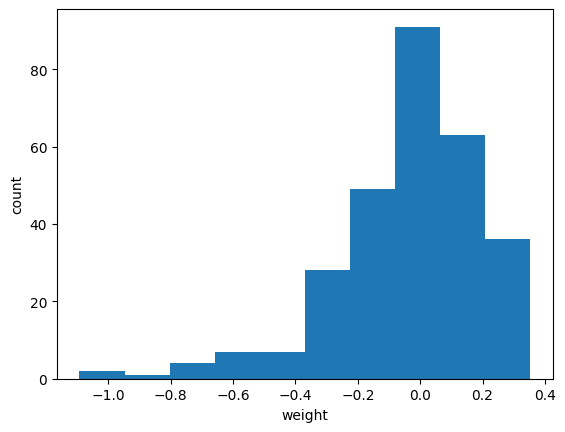

In [27]:
# 시각화

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

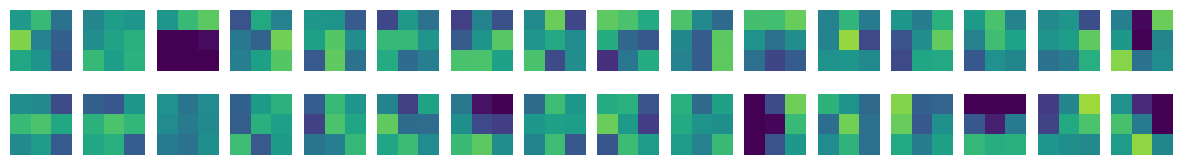

In [35]:
# 32 개의 커널 시각화

fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [36]:
# 훈련 되지 않은 합성곱 신경망 만들기

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [37]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [38]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
# 평균은 0에 가깝지만 표준편차는 이전과 달리 매우 작음

0.00412769 0.08171464


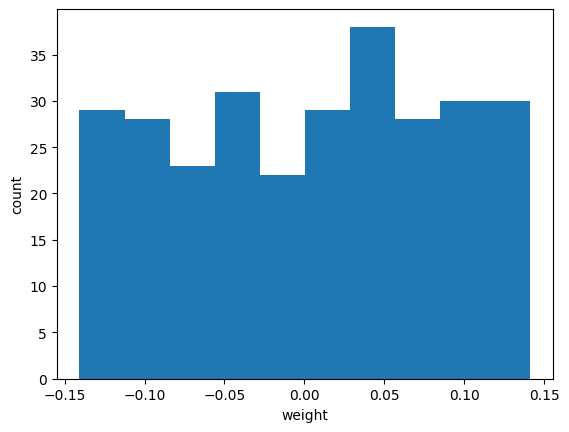

In [39]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 가중치들이 -0.15에서 0.15 사이에 있고 고른 분포 - 텐서플로가 신경망 처음 초기화 시 균등 분포에서 랜덤하게 값을 선택하기 때문

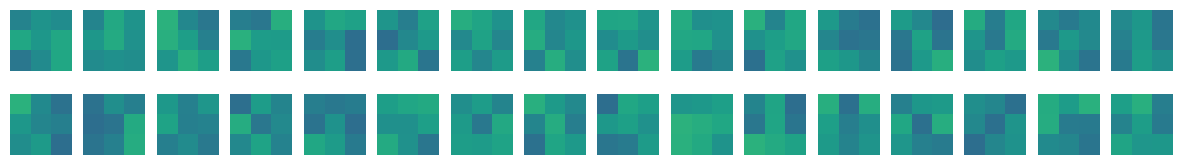

In [40]:
# 32 개의 커널 시각화

fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

# 가중치들이 밋밋하게 초기화 된 것 확인 

### 함수형 API

In [42]:
inputs = keras.Input(shape=(784,))

dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs)

outputs = dense2(hidden)

model = keras.Model(inputs, outputs)

In [45]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [46]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [47]:
conv_acti.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>


### 특성 맵 시각화

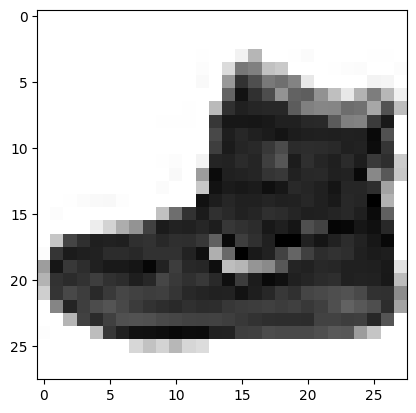

In [49]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [50]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 162ms/step


2024-12-16 19:09:22.373714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [51]:
print(feature_maps.shape)

(1, 28, 28, 32)


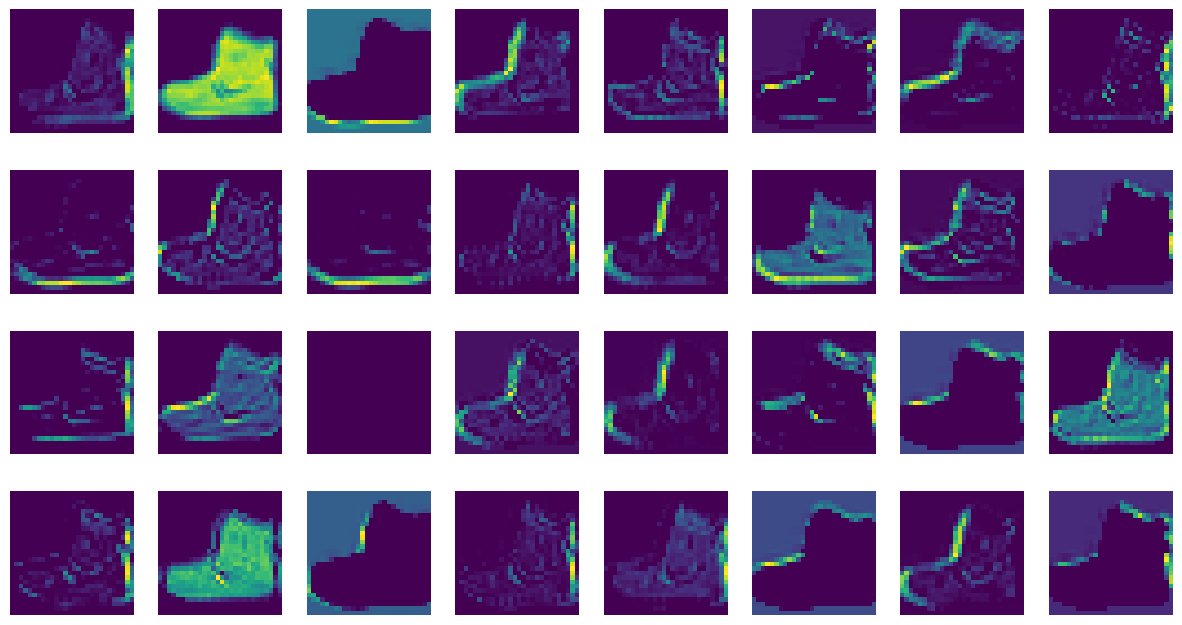

In [54]:
# 32 개의 커널 시각화

fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()



In [55]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [56]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 213ms/step


2024-12-16 20:02:23.756176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [57]:
print(feature_maps.shape)

(1, 14, 14, 64)


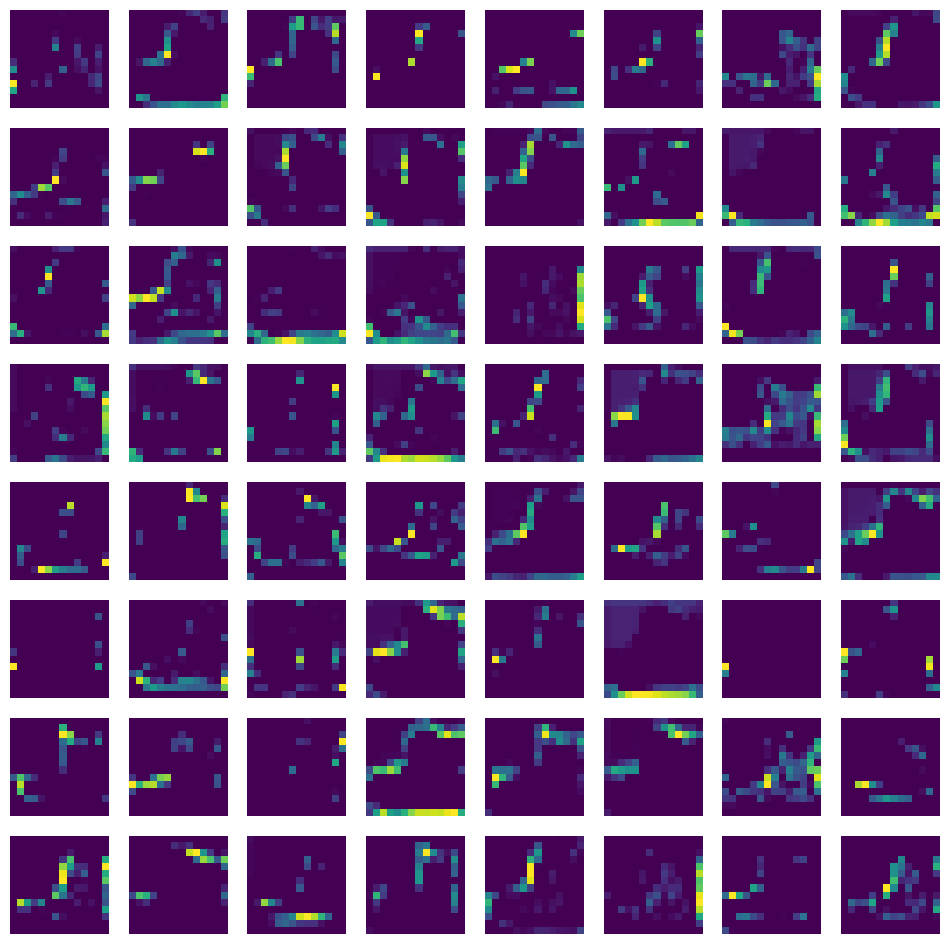

In [58]:
# 64 개의 커널 시각화

fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()



In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

합성곱 층을 많이 쌓을수록 이런 현상이 심해짐
- 합성곱 신경망의 앞부분: 이미지의 시각적인 정보를 감지
- 뒷부분: 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보 학습

- 입력에 가까운 합성곱 층은 이미지에서 시각적인 정보나 패턴을 감지
- 이어지는 합성곱은 이런 시각적인 정보를 활용해 조금 더 고차원적인 개념 학습